Face Detection and Recognition


A `data` directory was created containing three folders 30 face images of three players from the 2024 Philadelphia Phillies: Alec Bohm, Bryson Stott, and Brandon Marsh. The original images were downloaded from Google Images and the face images were extraced using the `extract_faces` function from the textbook. In addition, the `Samples` directory contains three images of a combination of those players.

The task is to create a system that can correctly detect and identify Bohm, Stott, and Marsh in those three sample images.

### Install Tensorflow 2.9.2

In [5]:
# CODE PROVIDED
import subprocess
import sys
from IPython.display import clear_output
def check_tensorflow():
    tf_desired_version = "2.9.2"

    try:
        import tensorflow as tf
        tf_installed_version = tf.__version__
    except ImportError:
        tf_installed_version = None

    #Check for the right version
    if tf_installed_version != tf_desired_version:
        print(f"Current TensorFlow version: {tf_installed_version}. Installing version {tf_desired_version}...")
        
        # Uninstall the current TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', 'tensorflow'])
        
        # Install the desired TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', f'tensorflow=={tf_desired_version}'])

        clear_output()
        
        print(f"TensorFlow version {tf_desired_version} installed successfully. Please restart your kernel to apply the changes.")
    else:
        print(f"TensorFlow version {tf_desired_version} is already installed.")    

check_tensorflow()

TensorFlow version 2.9.2 is already installed.


In [6]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images, labels = [], []
    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x, y = [], []

In [7]:
# Note that ResNet50 is not useful for facial recognition and detection which is why VGGface is necessary.

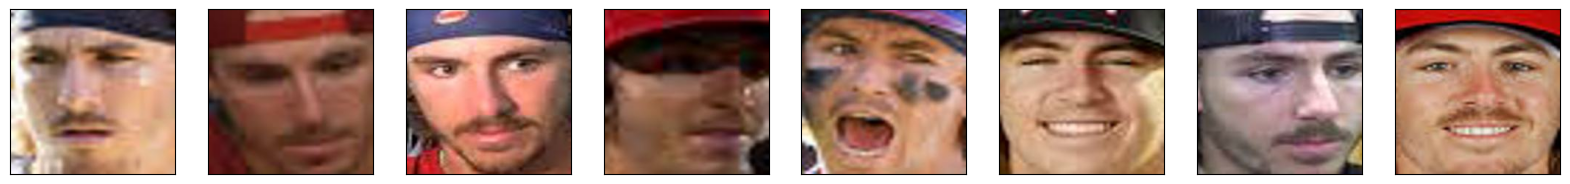

In [8]:
images, labels = load_images_from_path('data/Stott', 0)
show_images(images)

x += images
y += labels

In [9]:
# images, labels = load_images_from_path('data/stott-originals', 0)
# show_images(images)

# x += images
# y += labels

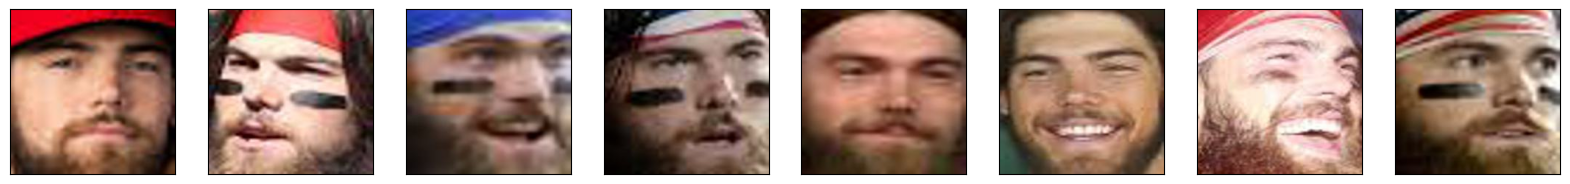

In [10]:
images, labels = load_images_from_path('data/Marsh', 1)
show_images(images)

x += images
y += labels

In [11]:
# images, labels = load_images_from_path('data/marsh-originals', 1)
# show_images(images)

# x += images
# y += labels

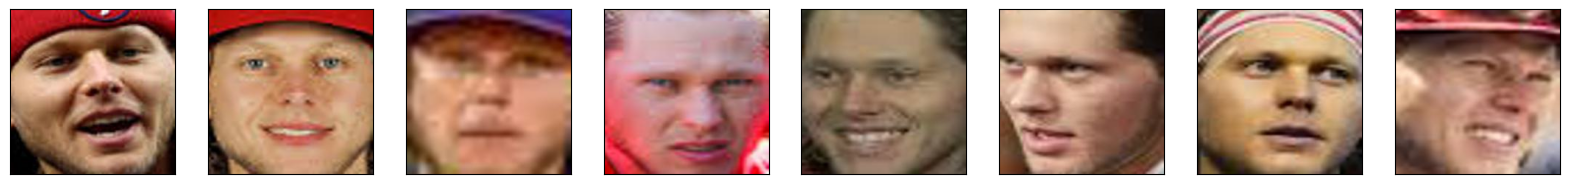

In [12]:
images, labels = load_images_from_path('data/Bohm', 2)
show_images(images)

x += images
y += labels

In [13]:
# images, labels = load_images_from_path('data/bohm-originals', 2)
# show_images(images)

# x += images
# y += labels

In [14]:
import numpy as np
import pandas as pd

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input

faces = preprocess_input(np.array(x))
labels = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(faces, labels, train_size=0.5, stratify=labels, random_state=0)

In [16]:
from tensorflow.keras.models import load_model

base_model = load_model('data/vggface.h5')
base_model.trainable = False

2025-08-28 22:35:08.148631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Resizing

model = Sequential()
model.add(Resizing(224, 224))
model.add(base_model)
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [18]:
# hist= model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=200)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255,
                         horizontal_flip=True,
                         rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         zoom_range=0.2)

# Wrap the ImageDataGenerator object around the training files
idg.fit(x_train)

# Generate randomly transformed images
image_batch_size = 10
generator = idg.flow(x_train, y_train, batch_size=image_batch_size, seed=0)

# Train a model using the randomly transformed images
model.fit(generator,
          steps_per_epoch=len(x_train) // image_batch_size,
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=10)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.3564 - accuracy: 0.3000 - val_loss: 1.8154 - val_accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 1.1732 - accuracy: 0.3000 - val_loss: 1.6860 - val_accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 1.0720 - accuracy: 0.4000 - val_loss: 1.6008 - val_accuracy: 0.2667
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.2227 - accuracy: 0.0000e+00 - val_loss: 1.5232 - val_accuracy: 0.2667
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 1.0916 - accuracy: 0.4000 - val_loss: 1.4522 - val_accuracy: 0.2667
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 1.1039 - accuracy: 0.3000 - val_loss: 1.4037 - val_accuracy: 0.2667
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 1.1200 - accuracy: 0.3000 - val_loss: 1.3761 - val_accuracy: 0.3333
Epoch 8/10
1/1 [=====================

In [41]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=100)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 1.1316 - accuracy: 0.6667 - val_loss: 0.9339 - val_accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 0.6311 - accuracy: 0.8000 - val_loss: 0.8039 - val_accuracy: 0.7333
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 0.3043 - accuracy: 0.9333 - val_loss: 0.7206 - val_accuracy: 0.7333
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 0.1403 - accuracy: 1.0000 - val_loss: 0.5559 - val_accuracy: 0.7333
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 0.3894 - val_accuracy: 0.8000
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.2542 - val_accuracy: 0.8667
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.1689 - val_accuracy: 0.8667
Epoch 8/100
1/1 [=================

In [43]:
from mtcnn.mtcnn import MTCNN
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image
from matplotlib.patches import Rectangle

def get_face(image, face):
    x1, y1, w, h = face['box']
    
    if w > h:
        x1 = x1 + ((w - h) // 2)
        w = h
    elif h > w:
        y1 = y1 + ((h - w) // 2)
        h = w
        
    x2 = x1 + h
    y2 = y1 + w
    
    return image[y1:y2, x1:x2]

def label_faces(path, model, names, face_threshold=0.9, prediction_threshold=0.9, show_outline=True, size=(12, 8)):
    # Load the image and orient it correctly
    pil_image = Image.open(path)
    exif = pil_image.getexif()
    
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
            
    pil_image.info["exif"] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    np_image = np.array(pil_image)

    fig, ax = plt.subplots(figsize=size, subplot_kw={'xticks': [], 'yticks': []})
    ax.imshow(np_image)

    detector = MTCNN()
    faces = detector.detect_faces(np_image)
    faces = [face for face in faces if face['confidence'] > face_threshold]

    for face in faces:
        x, y, w, h = face['box']

        # Use the model to identify the face
        face_image = get_face(np_image, face)
        face_image = image.array_to_img(face_image)
        face_image = preprocess_input(np.array(face_image))
        predictions = model.predict(np.expand_dims(face_image, axis=0))
        confidence = np.max(predictions)

        if (confidence > prediction_threshold):
        # Optionally draw a box around the face
            if show_outline:
                rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
                ax.add_patch(rect)

            # Label the face
            index = int(np.argmax(predictions))
            text = f'{names[index]} ({confidence:.1%})'
            ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

1/1 [==============================] - 0s 176ms/step


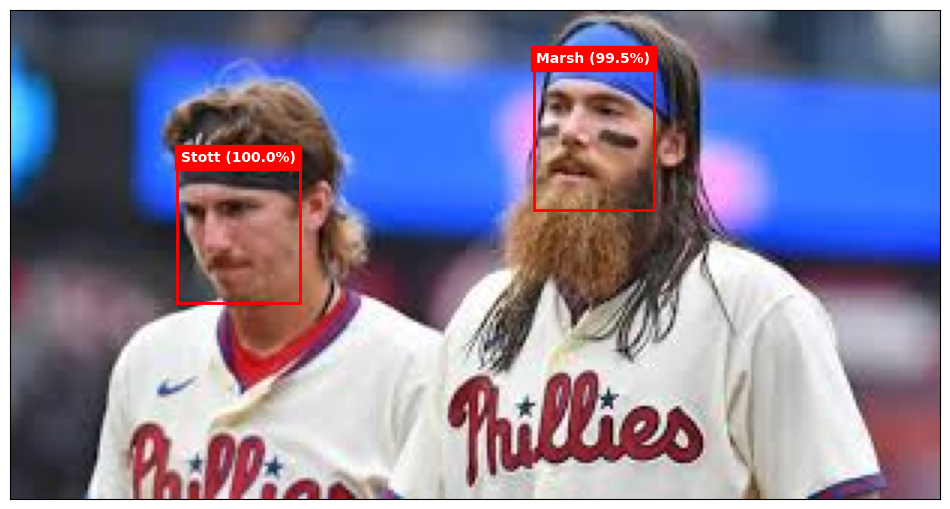

In [45]:
labels = ['Stott', 'Marsh', 'Bohm']
label_faces('data/Samples/Sample-1.jpeg', model, labels)

1/1 [==============================] - 0s 291ms/step


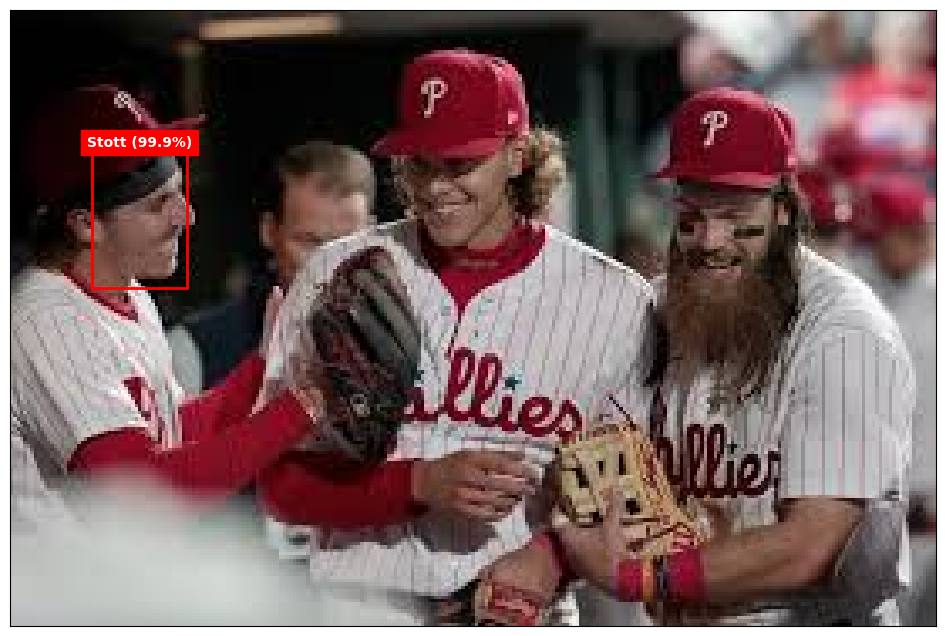

In [47]:
labels = ['Stott', 'Marsh', 'Bohm']
label_faces('data/Samples/Sample-2.jpeg', model, labels)

1/1 [==============================] - 0s 212ms/step


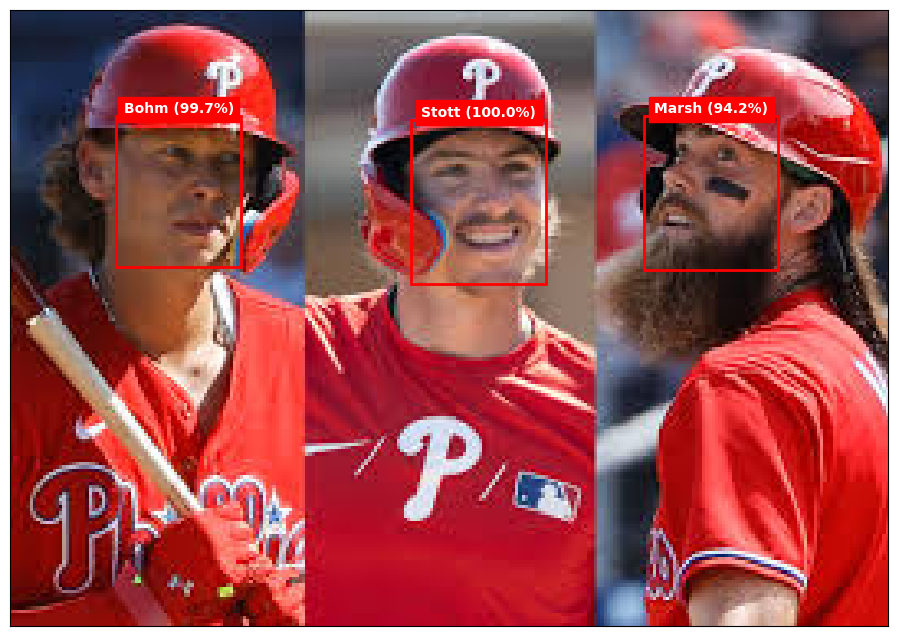

In [49]:
labels = ['Stott', 'Marsh', 'Bohm']
label_faces('data/Samples/Sample-3.jpeg', model, labels)

## Codegrade Validation

### Execute the cells below to generate the file required for submission to Codegrade. DO NOT CHANGE THE CODE.

In [51]:

import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from PIL import Image, ImageOps
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.applications.resnet50 import preprocess_input


def make_pred(path, model, names, face_threshold=0.9, prediction_threshold=0.9, show_outline=True, size=(12, 8)):
    # Load the image and orient it correctly
    pil_image = Image.open(path)
    exif = pil_image.getexif()
    
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
            
    pil_image.info["exif"] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    np_image = np.array(pil_image)

    detector = MTCNN()
    faces = detector.detect_faces(np_image)
    faces = [face for face in faces if face['confidence'] > face_threshold]

    for face in faces:
        x, y, w, h = face['box']

        # Use the model to identify the face
        face_image = get_face(np_image, face)
        face_image = image.array_to_img(face_image)
        face_image = preprocess_input(np.array(face_image))
        predictions = model.predict(np.expand_dims(face_image, axis=0))
        confidence = np.max(predictions)

        if (confidence > prediction_threshold):
            return predictions
            

        return None
        
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def get_all_images_from_directory(directory):
    images = []
    labels = []
    images_names = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            images_names += [img for img in os.listdir(label_path)]
            images += [os.path.join(label_path, img) for img in os.listdir(label_path)]
            labels += [int(label)] * len(os.listdir(label_path))
    
    # Embaralhar as imagens e labels
    combined = list(zip(images_names, images, labels))
    random.shuffle(combined)
    images_names, images, labels = zip(*combined)
    
    #return images_names, images, labels
    return zip(*combined)

def predict_and_validate(model, image_names, image_paths, true_labels, class_labels):
    predictions = []
    for img_path in image_paths:
        predictions.append(make_pred(img_path, model, class_labels, prediction_threshold=0.8))
    
    results = [true == pred for true, pred in zip(true_labels, predictions)]
    
    df = pd.DataFrame({
        'Player': image_names,
        'Prediction Array': predictions
    })
    
    return df

In [53]:

from IPython.display import clear_output

model_to_evaluate = model  #MAKE SURE TO USE YOUR MODEL

class_labels = {0: 'Alec Bohm', 1: 'Bryson Stott', 2: 'Brandon Marsh'} 
image_names, image_paths, true_labels = get_all_images_from_directory('data/codegrade_test/')
prediction_df = predict_and_validate(model_to_evaluate, image_names, image_paths, true_labels, class_labels)
clear_output()
prediction_df

,Player,Prediction Array
0,Brandon_04.png,"[[7.2600865e-06, 0.9997632, 0.00022949082]]"
1,alec_06.jpg,"[[7.4978684e-06, 9.839898e-12, 0.9999925]]"
2,alec_01.jpg,"[[1.794067e-07, 6.9509435e-14, 0.99999976]]"
3,Brandon_03.png,"[[7.890022e-07, 0.99981517, 0.00018400447]]"
4,Bryson_06.png,"[[0.9999989, 1.2480788e-07, 9.0768805e-07]]"
5,alec_04.jpg,"[[0.006772836, 8.840922e-09, 0.9932272]]"
6,Brandon_08.png,"[[0.001115969, 0.9968232, 0.002060928]]"
7,Bryson_09.png,"[[1.0, 9.379912e-09, 8.958671e-10]]"
8,Brandon_07.png,"[[0.00018977851, 0.9994943, 0.00031590334]]"
9,alec_07.jpg,"[[4.9993605e-07, 3.0637481e-09, 0.9999995]]"


### Export Prediction Array for Codegrade evaluation


In [ ]:
# CODE PROVIDED
import pandas as pd

#export your classification model
prediction_df.to_pickle('prediction_df')